In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### Load house sales data

### Dataset is from house sales in King County, the region where the city of Seattle, WA is located.


In [2]:
house = pd.read_csv("B:\\downloads\\kc_house_data\\kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Exploring the data for housing sales 

##### The house price is correlated with the number of square feet of living space.

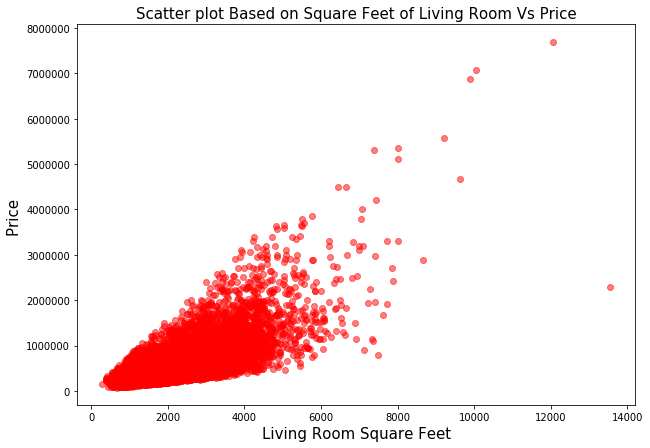

In [3]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=house.sqft_living,y=house.price,c='red', alpha=0.5)
plt.title('Scatter plot Based on Square Feet of Living Room Vs Price',fontsize=15)
plt.xlabel('Living Room Square Feet',fontsize=15)
plt.ylabel('Price ',fontsize=15)
plt.show()

Text(0.5,0,'Price')

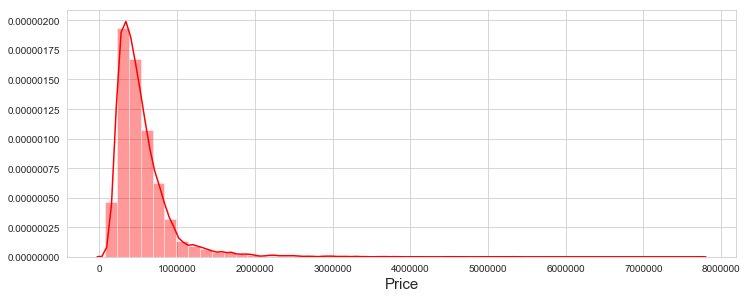

In [4]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.figure(1)
plt.subplot(211)
sns.set_style('whitegrid')
sns.distplot(house['price'],color='red')
plt.xlabel('Price', fontsize=15)


### Create a simple regression model of Living Area Square Feet to price

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our evaluation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})
# splitting data
train_data,test_data = train_test_split(house,train_size = 0.8,random_state=3)
# Linear Model 

X_train = np.array(house['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(house['price'], dtype=pd.Series)


# Evaluate the simple model
X_test = np.array(house['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(house['price'], dtype=pd.Series)

In [11]:
# Define the Linear Regression Model
lr = LinearRegression()
# Fit the Linear Regression Model to the train set
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')
rtrsm = format(lr.score(X_train, y_train),'.3f')
rtesm = format(lr.score(X_test, y_test),'.3f')
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
k = evaluation.shape[0]
evaluation.loc[k] = ['Simple Model','-',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 540088.142
Intercept: -43580.74309447594
Coefficient: [280.6235679]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Simple Model,-,261440.790,0.493,-,0.493,-


### Let's show what our predictions look like

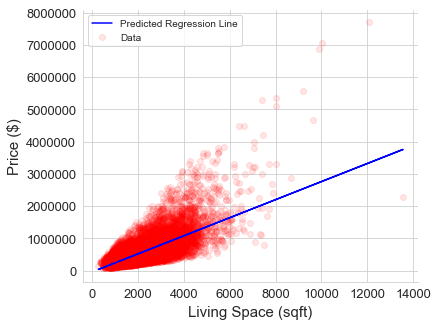

In [14]:
plt.figure(figsize=(6,5))
plt.scatter(X_test,y_test,color='red',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="blue",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Exploratory Data analysis

In-Depth analysis on the given data set



In [44]:
def plotre(df,t1='',t2=''):
    f,ax=plt.subplots(figsize=(10,6))
    sns.boxplot(x=t1, y=t2, data=df, palette=color_types)
    plt.xlabel(t1,fontsize=15)
    plt.ylabel(t2,fontsize=15)
  
    a=plt.show()
    return a

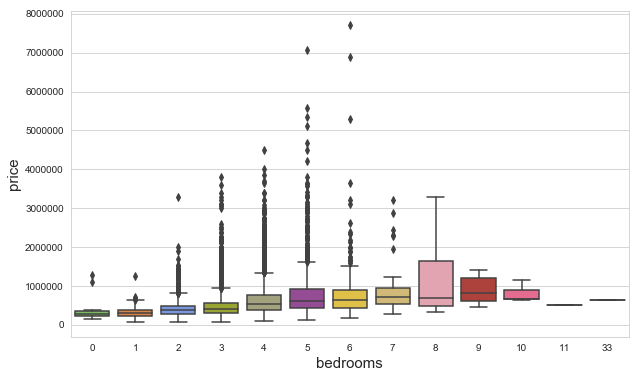

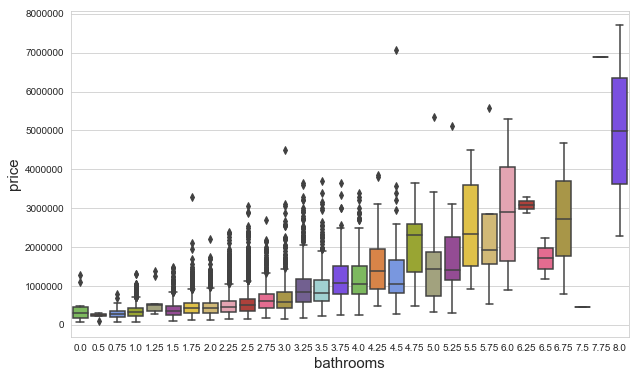

In [46]:
plotre(house,'bedrooms','price')
plotre(house,'bathrooms','price')

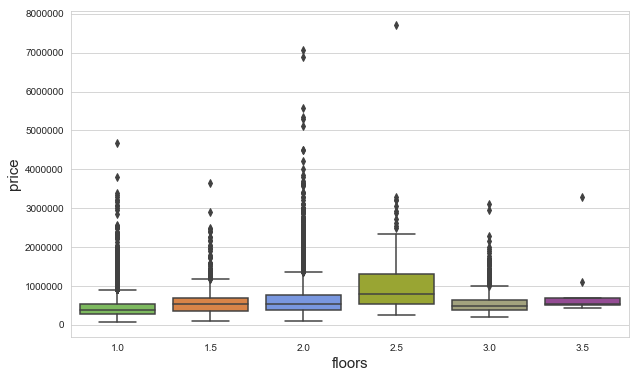

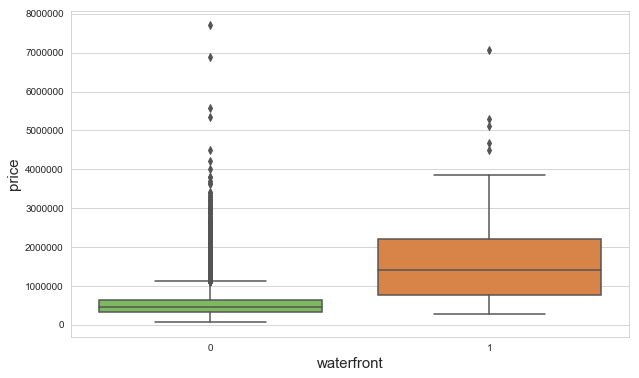

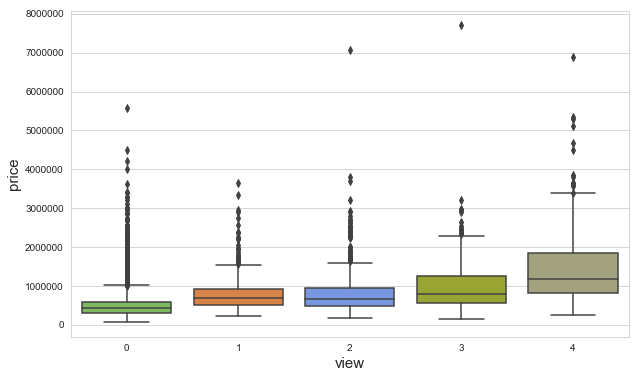

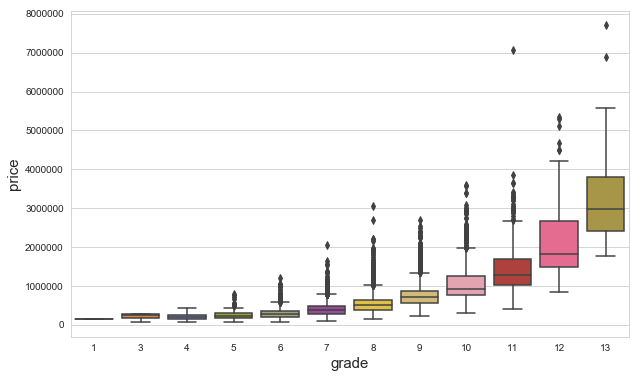

In [48]:
plotre(house,'floors','price')
plotre(house,'waterfront','price')
plotre(house,'view','price')
plotre(house,'grade','price')

### Pairplot Visualization

Let's create some Seaborn pairplots for the features ('sqft_lot','sqft_above','price','sqft_living','bedrooms') to get a feel for how the various features are distributed vis-a-vis the price as well as the number of bedrooms

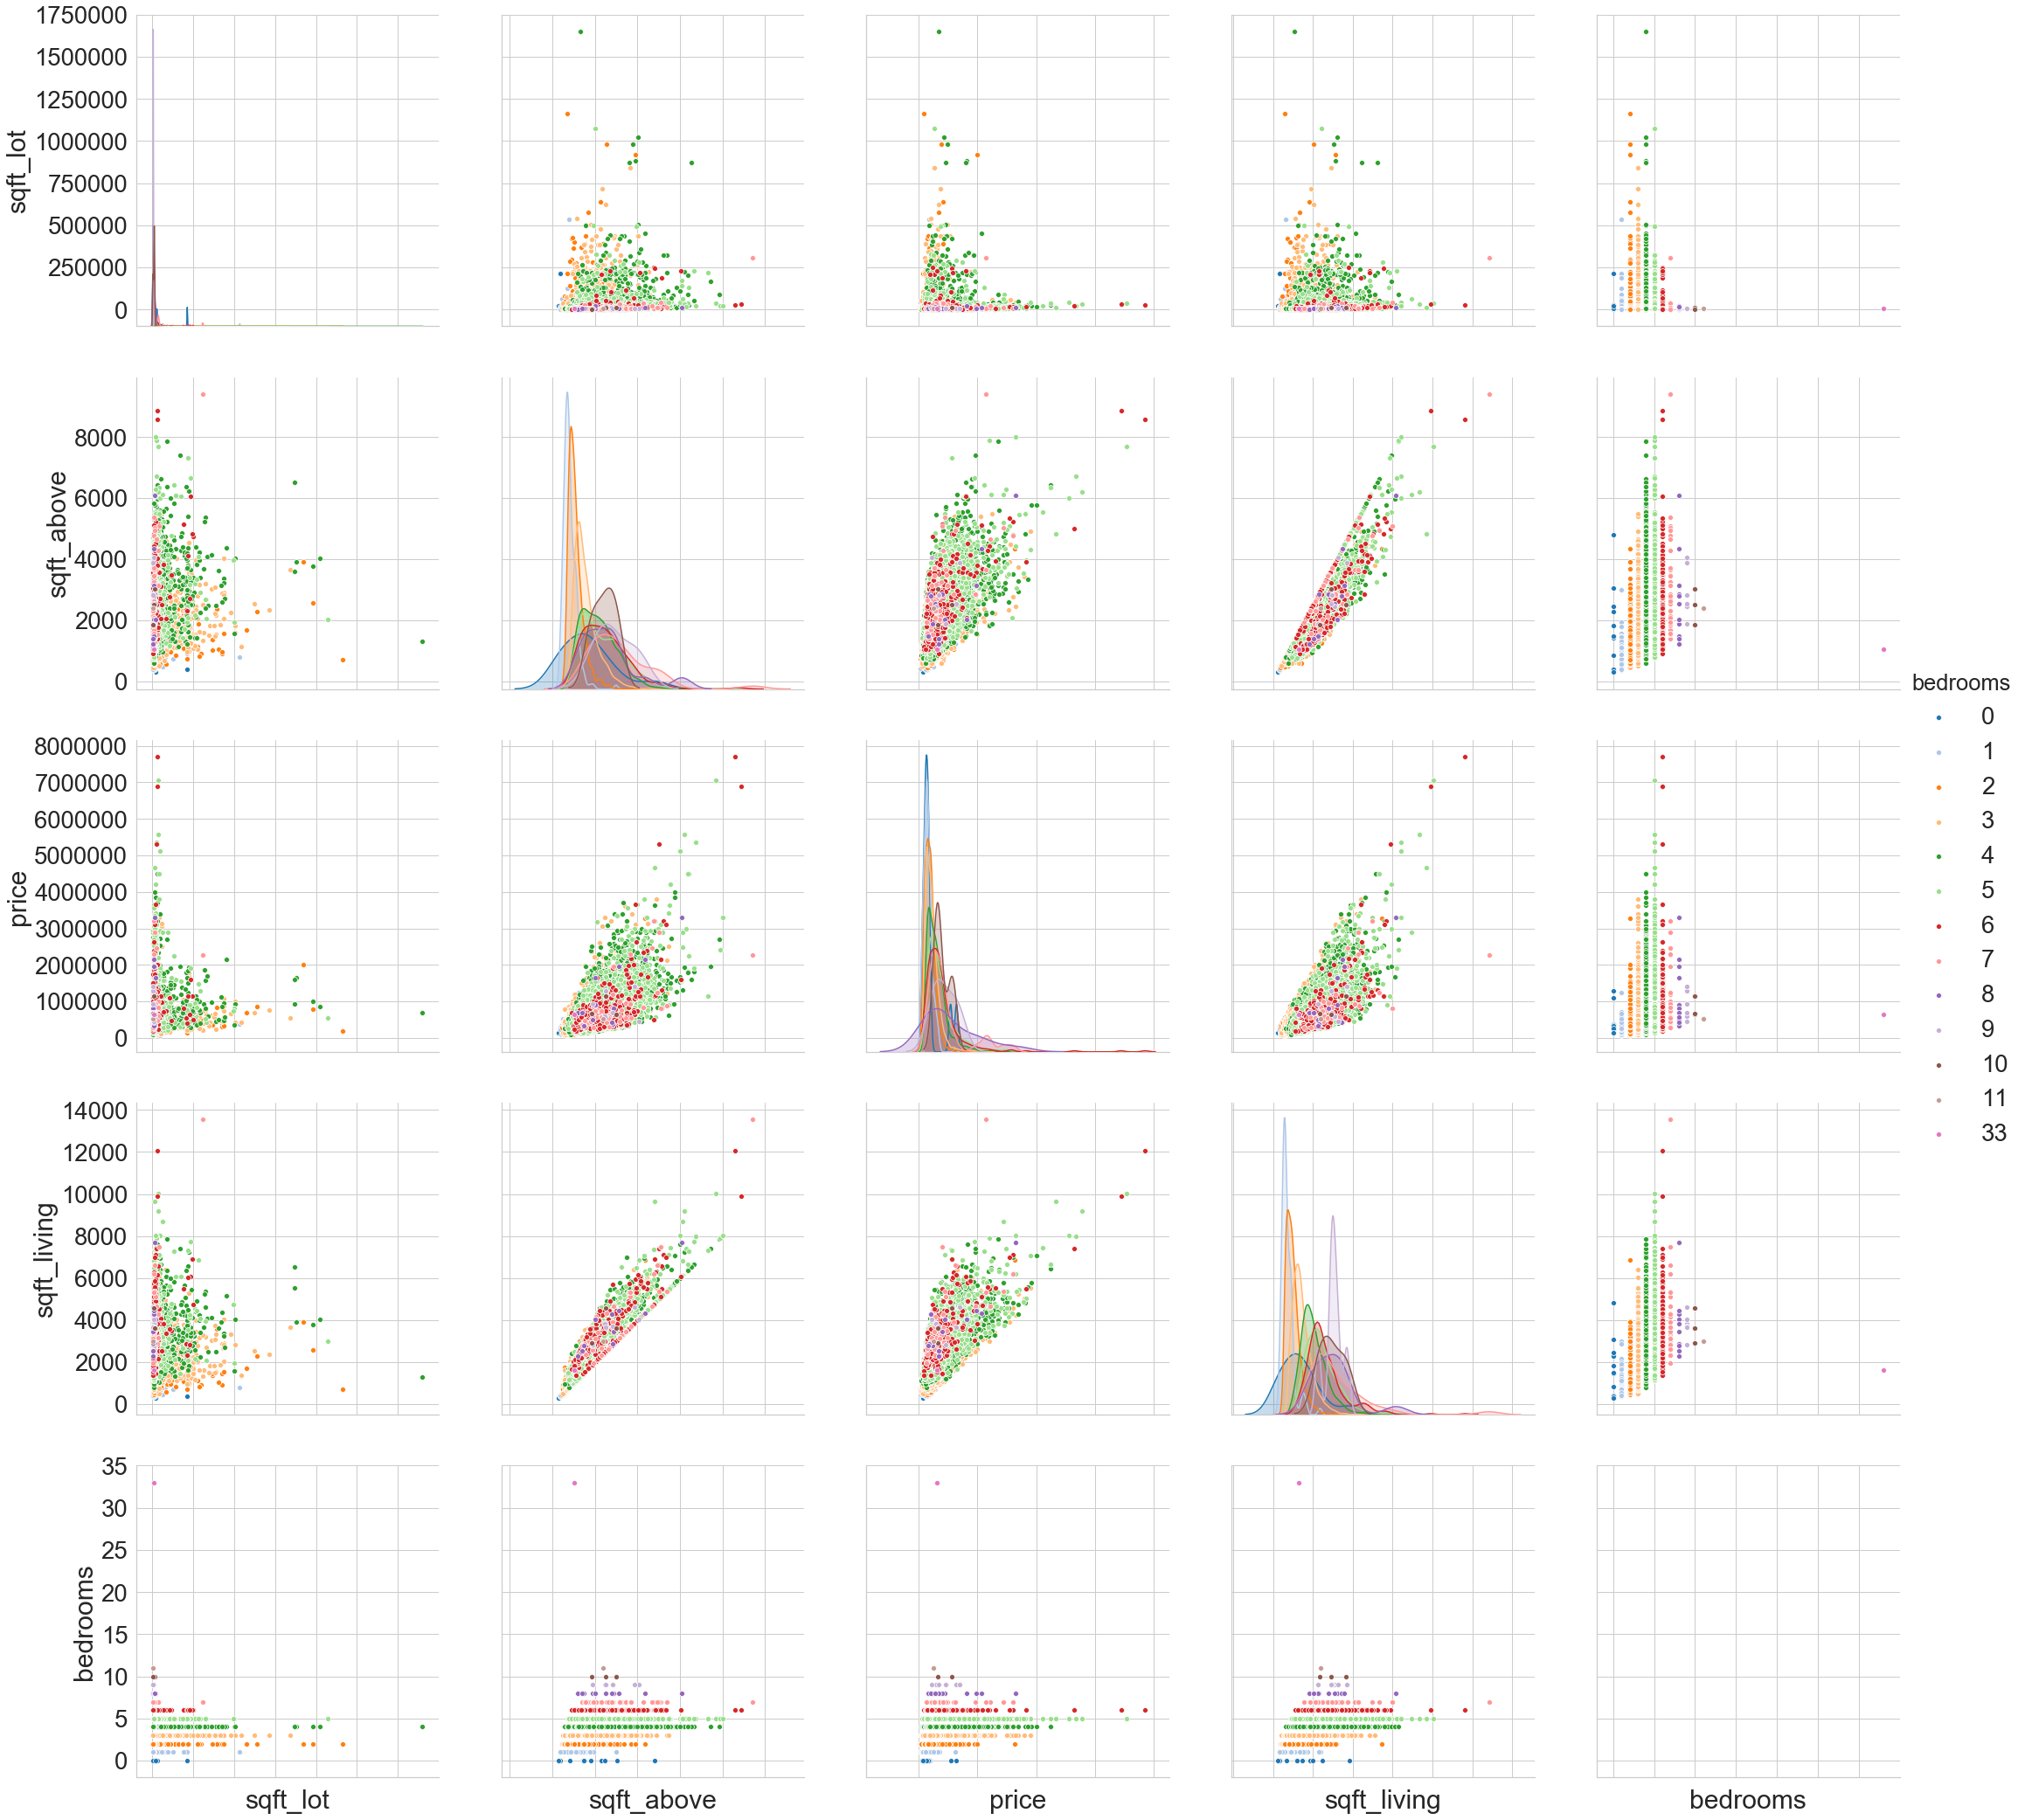

In [62]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[])

Let's create some Seaborn pairplots for the features ('sqft_lot','sqft_above','price','sqft_living','bedrooms') to get a feel for how the various features are distributed vis-a-vis the price as well as the number of floors

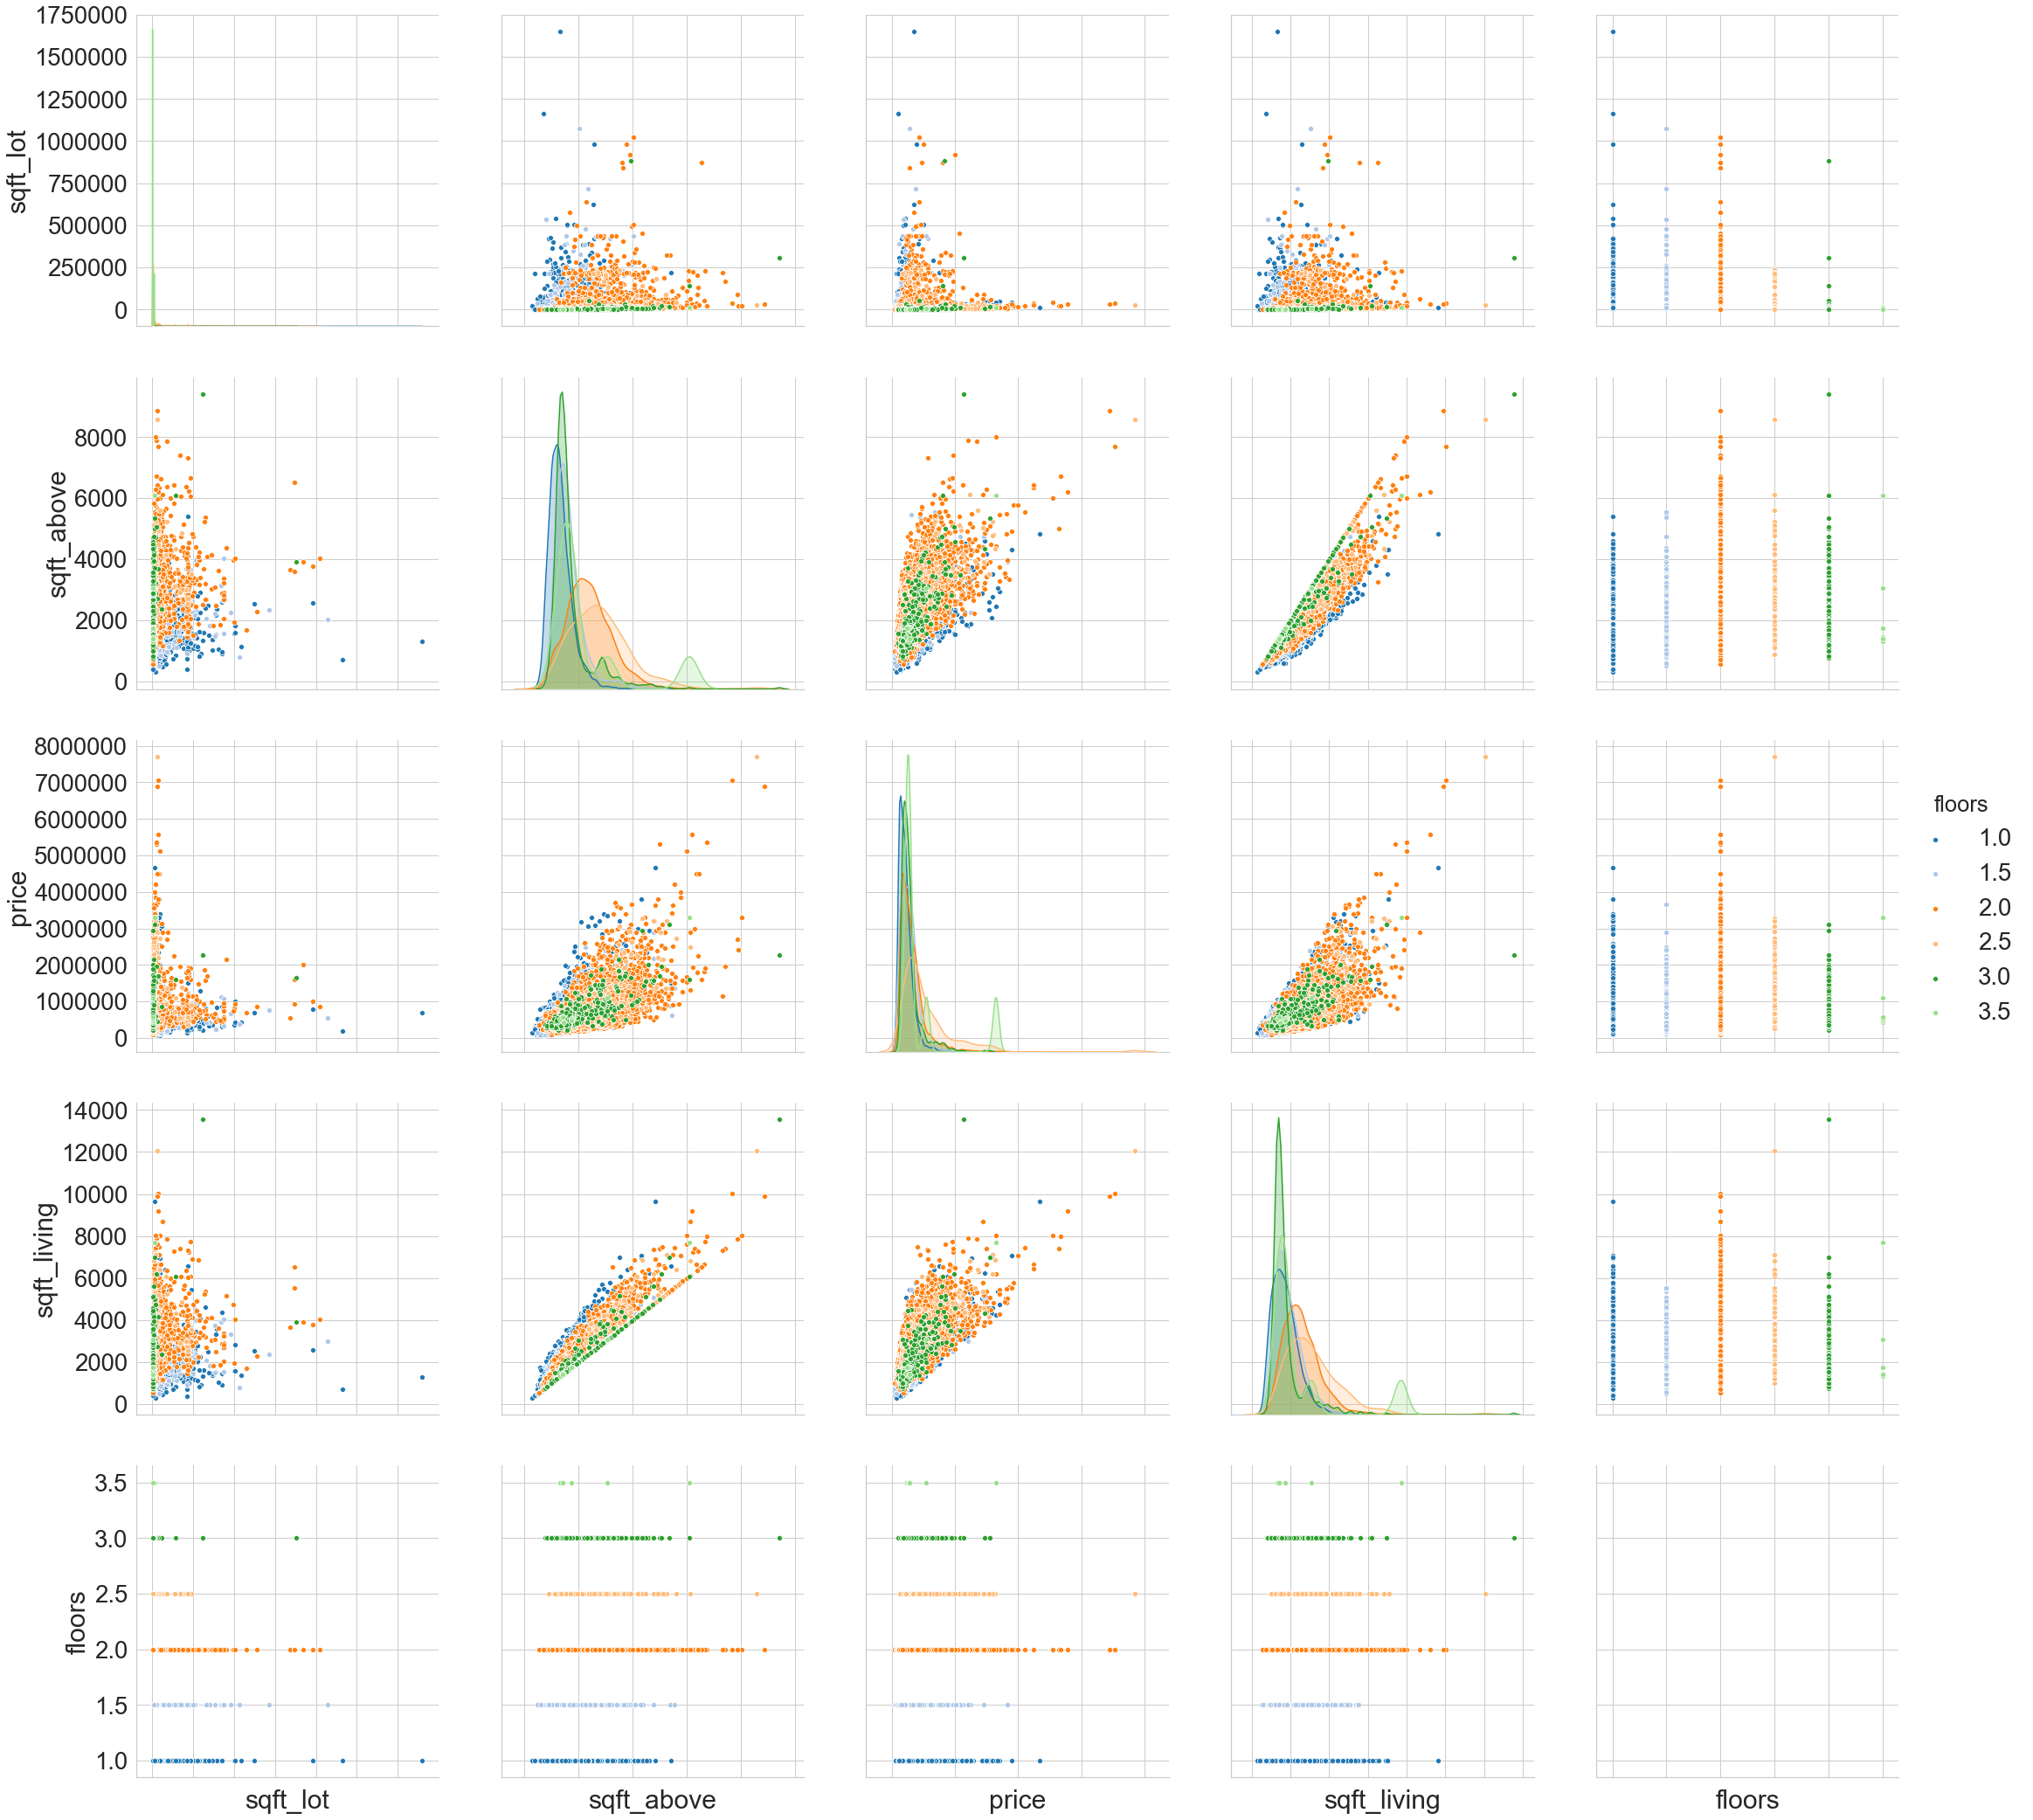

In [66]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','floors']], 
                 hue='floors', palette='tab20',size=6)
g.set(xticklabels=[])


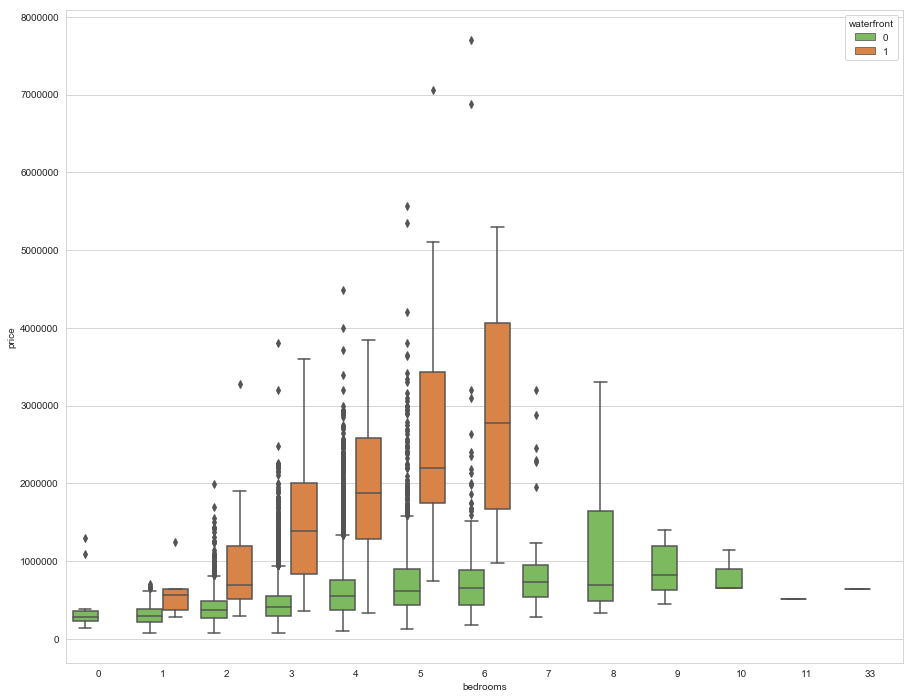

In [73]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x="bedrooms", y="price", hue="waterfront",data=house,palette=color_types)


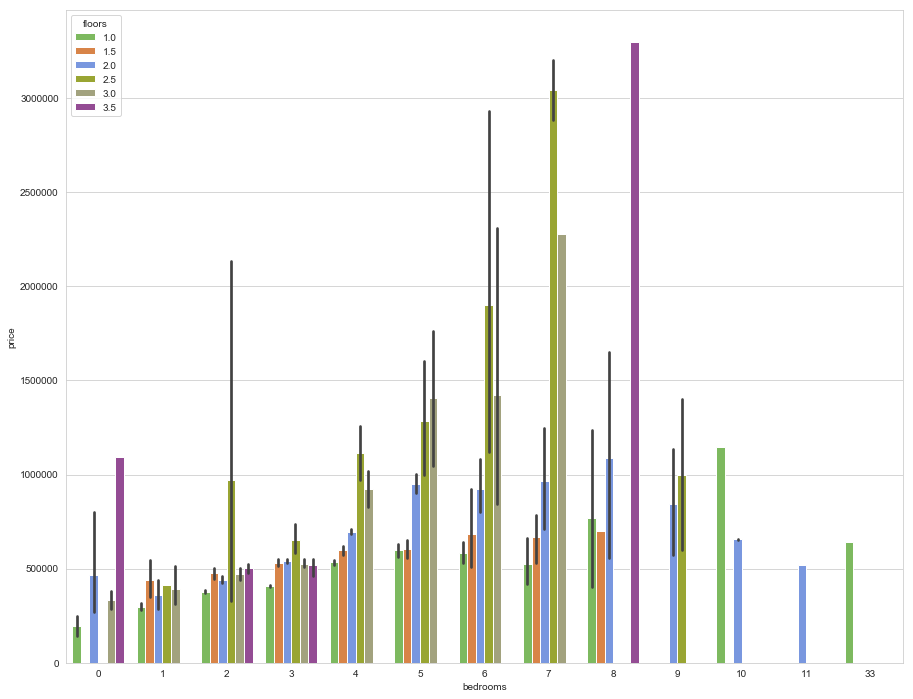

In [75]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x="bedrooms", y="price", hue="floors",data=house,palette=color_types)

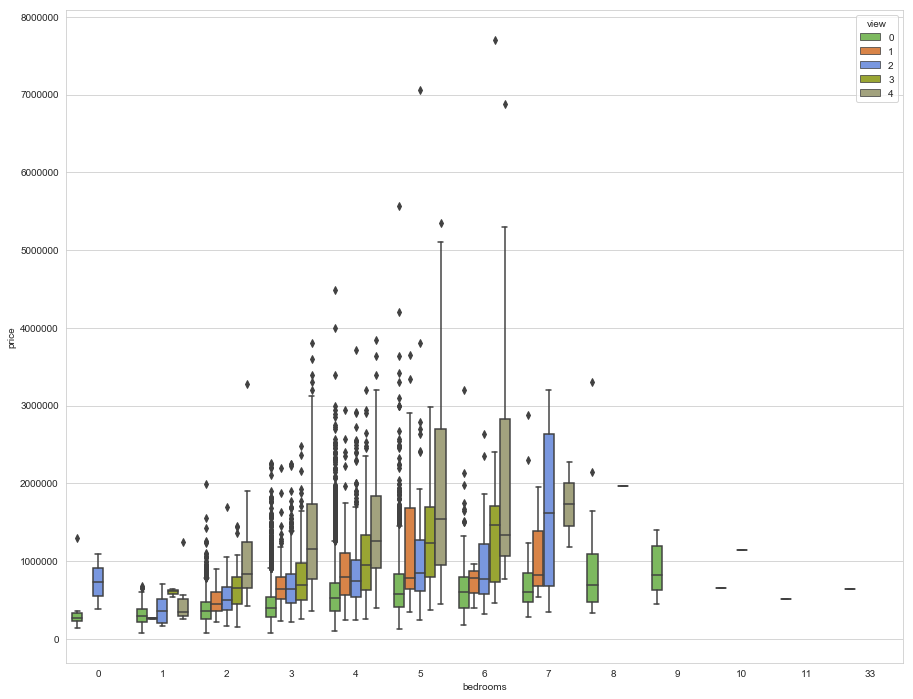

In [77]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x="bedrooms", y="price", hue="view",data=house,palette=color_types)


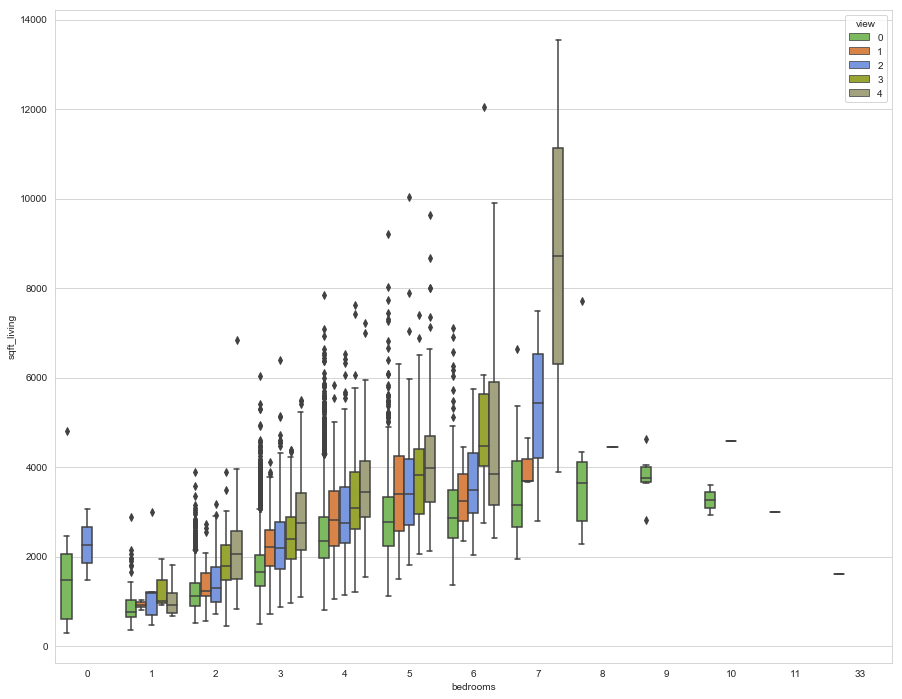

In [78]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x="bedrooms", y="sqft_living", hue="view",data=house,palette=color_types)

[Text(0.5,0,'\n Year Built'), Text(0.5,0,'\\Grade'), Text(0.5,0,'\nView')]

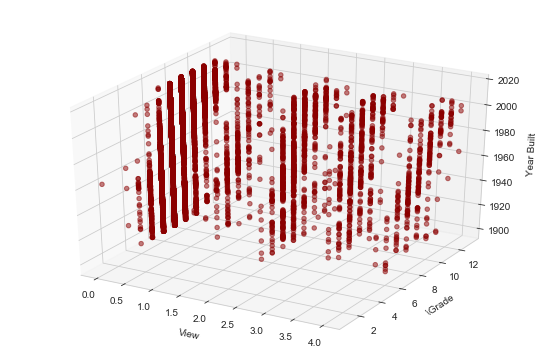

In [87]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(house['view'],house['grade'],house['yr_built'],c="darkred",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\n Year Built')

[(0, 12)]

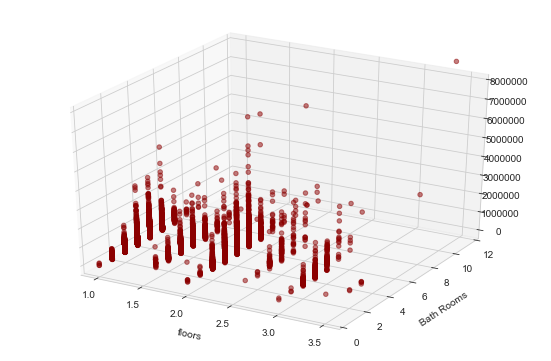

In [92]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(house['floors'],house['bedrooms'],house['price'],c="darkred",alpha=.5)
ax.set(xlabel='\nfloors',ylabel='\n Bath Rooms',zlabel='\n')
ax.set(ylim=[0,12])

[(0, 12)]

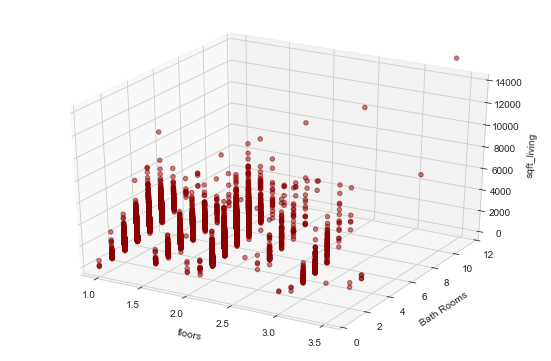

In [91]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(house['floors'],house['bedrooms'],house['sqft_living'],c="darkred",alpha=.5)
ax.set(xlabel='\nfloors',ylabel='\n Bath Rooms',zlabel='\nsqft_living')
ax.set(ylim=[0,12])

[(0, 250000)]

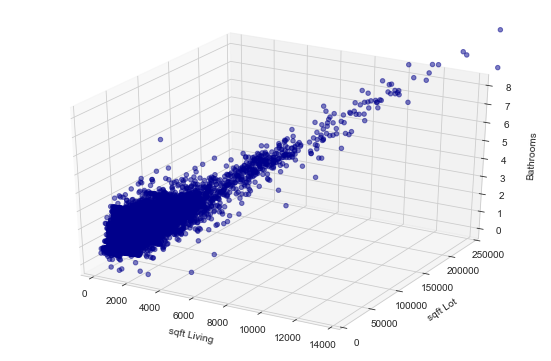

In [95]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(house['sqft_living'],house['sqft_lot'],house['bathrooms'],c="darkblue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms')
ax.set(ylim=[0,250000])